<a href="https://colab.research.google.com/github/zeuxi141/StockPricePrediction/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import rcParams
rcParams['figure.figsize'] = 20,10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

from sklearn.preprocessing import MinMaxScaler
#Read the dataset use the NSE-TATA.csv
url = 'https://github.com/Matt-Jennings-GitHub/Tata-Global-Forcasting/blob/master/NSE-TATAGLOBAL.csv?raw=true'
df = pd.read_csv(url)
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2019-01-04,210.60,214.90,210.00,213.50,213.80,1213181.0,2583.05
1,2019-01-03,214.95,215.35,209.90,210.55,210.05,2096553.0,4433.50
2,2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31
3,2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
4,2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09


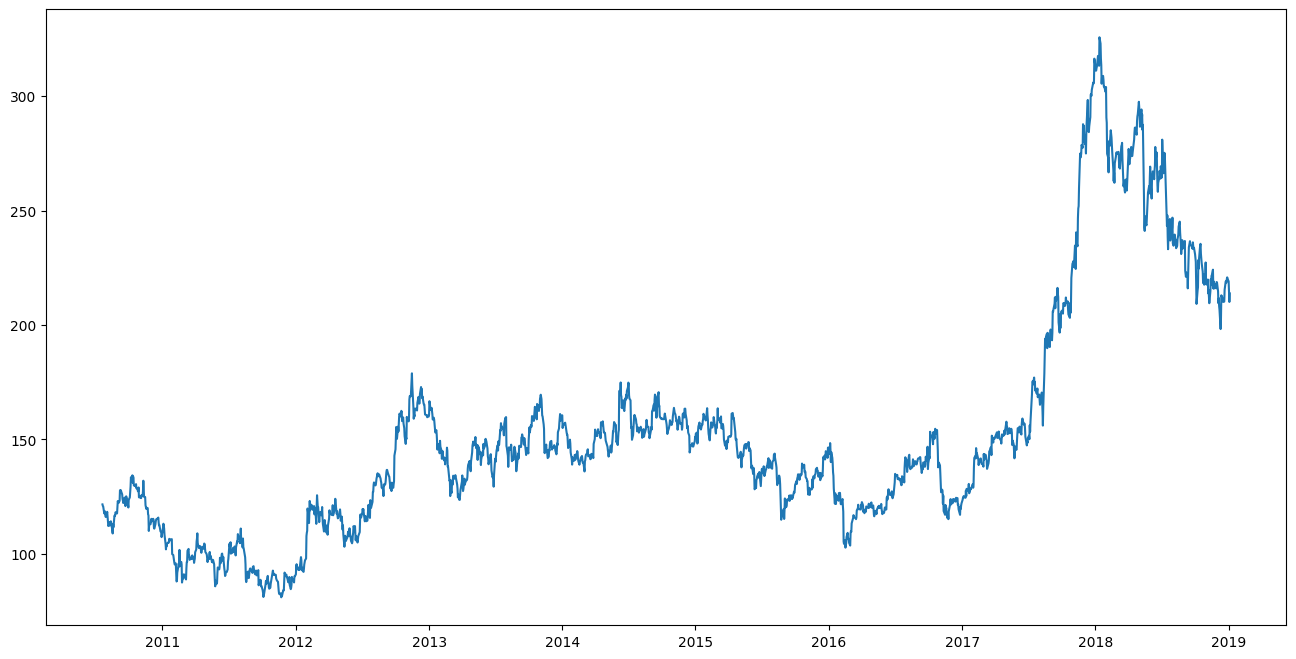

In [ ]:
#Analyze the closing prices from data frames
df["Date"] = pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index = df['Date']

plt.figure(figsize=(16,8))
plt.plot(df["Close"], label='Close Price history')
#

In [ ]:
#Sort the dataset on date time and filter "Date" and "Close" columns:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

In [ ]:
# print(new_dataset.index)
print(new_dataset.values)

[[Timestamp('2010-07-21 00:00:00') 121.55]
 [Timestamp('2010-07-22 00:00:00') 120.9]
 [Timestamp('2010-07-23 00:00:00') 120.65]
 ...
 [Timestamp('2019-01-02 00:00:00') 214.6]
 [Timestamp('2019-01-03 00:00:00') 210.05]
 [Timestamp('2019-01-04 00:00:00') 213.8]]


In [ ]:
#Normalize the new filtered dataset:
scaler=MinMaxScaler(feature_range=(0,1))


train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]

#Convert Dataframe to numpy array
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)
final_dataset=new_dataset.values
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [ ]:
#Build and train the LSTM model:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

927/927 - 76s - loss: 7.9530e-04 - 76s/epoch - 82ms/step


In [ ]:
# Take a sample of a dataset to make stock price predictions using the LSTM model:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

35/35 [==============================] - 1s 16ms/step


In [ ]:
#Save the LSTM model:
lstm_model.save("saved_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<ipython-input-58-bca2c640ce97>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_closing_price


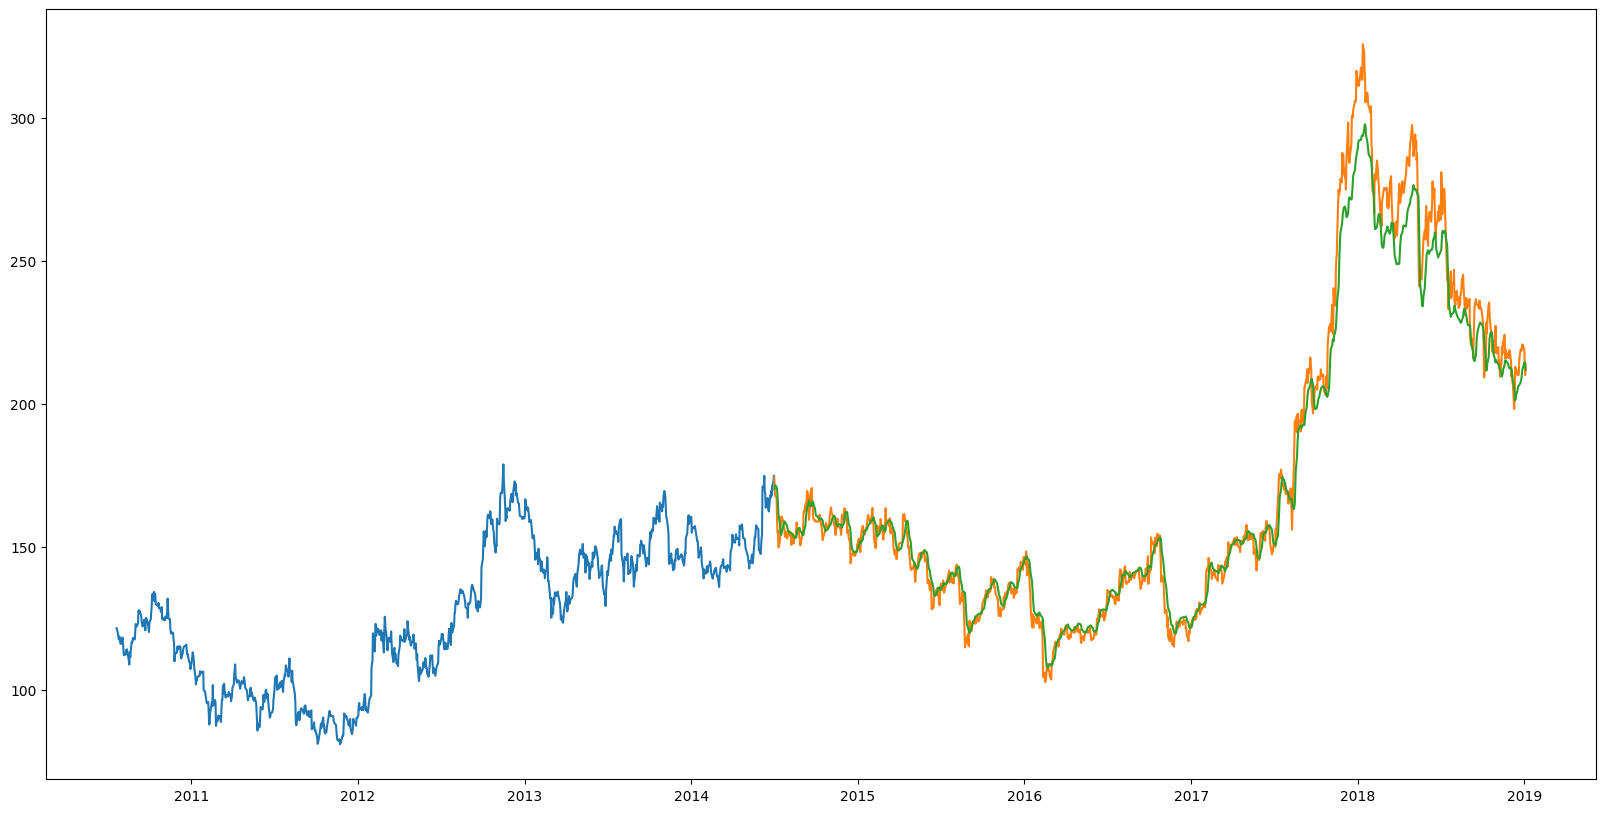

In [ ]:
#Visualize the predicted stock costs with actual stock costs:
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])

<h1> Build the dashboard using Plotly dash </h1>



In [ ]:
!pip install dash
!pip install dash-html-components
!pip install dash-core-components

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 45.1 MB/s eta 0:00:00


In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf


# List of 10 cryptocurrency tickers
tickers = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'USDT-USD', 'SOL-USD', 'ADA-USD', 'XRP-USD', 'DOGE-USD', 'DOT-USD', 'UNI-USD']

print(tickers)
# Fetch data for each ticker
crypto_data = {}
for ticker in tickers:
    crypto_data[ticker] = yf.Ticker(ticker).history(period="1d")

# # Print the fetched data
for ticker, data in crypto_data.items():
    print(f"Data for {ticker}:")
    print(data)
    print("\n")

['BTC-USD', 'ETH-USD', 'BNB-USD', 'USDT-USD', 'SOL-USD', 'ADA-USD', 'XRP-USD', 'DOGE-USD', 'DOT-USD', 'UNI-USD']


In [ ]:
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)

stock_data = getLocalFiles()

KeyboardInterrupt: 

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.graph_objs as go
from dash.dependencies import Input, Output
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import numpy as np


app = dash.Dash()
server = app.server

scaler=MinMaxScaler(feature_range=(0,1))

url = 'https://github.com/Matt-Jennings-GitHub/Tata-Global-Forcasting/blob/master/NSE-TATAGLOBAL.csv?raw=true'
df_nse = pd.read_csv(url)

df_nse["Date"]=pd.to_datetime(df_nse.Date,format="%Y-%m-%d")
df_nse.index=df_nse['Date']


data=df_nse.sort_index(ascending=True,axis=0)
new_data=pd.DataFrame(index=range(0,len(df_nse)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_data["Date"][i]=data['Date'][i]
    new_data["Close"][i]=data["Close"][i]

new_data.index=new_data.Date
new_data.drop("Date",axis=1,inplace=True)

dataset=new_data.values

train=dataset[0:987,:]
valid=dataset[987:,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

x_train,y_train=[],[]

for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

model=load_model("saved_model.h5")

inputs=new_data[len(new_data)-len(valid)-60:].values
inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)

X_test=[]
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
closing_price=model.predict(X_test)
closing_price=scaler.inverse_transform(closing_price)

train=new_data[:987]
valid=new_data[987:]
valid['Predictions']=closing_price



df= stock_data


app.layout = html.Div([

    html.H1("Stock Price Analysis Dashboard", style={"textAlign": "center"}),

    dcc.Tabs(id="tabs", children=[

        dcc.Tab(label='NSE-TATAGLOBAL Stock Data',children=[
            html.Div([
                html.H2("Actual closing price",style={"textAlign": "center"}),
                dcc.Graph(
                    id="Actual Data",
                    figure={
                        "data":[
                            go.Scatter(
                                x=train.index,
                                y=valid["Close"],
                                mode='markers'
                            )

                        ],
                        "layout":go.Layout(
                            title='scatter plot',
                            xaxis={'title':'Date'},
                            yaxis={'title':'Closing Rate'}
                        )
                    }

                ),
                html.H2("LSTM Predicted closing price",style={"textAlign": "center"}),
                dcc.Graph(
                    id="Predicted Data",
                    figure={
                        "data":[
                            go.Scatter(
                                x=valid.index,
                                y=valid["Predictions"],
                                mode='markers'
                            )

                        ],
                        "layout":go.Layout(
                            title='scatter plot',
                            xaxis={'title':'Date'},
                            yaxis={'title':'Closing Rate'}
                        )
                    }

                )
            ])


        ]),
        dcc.Tab(label='Facebook Stock Data', children=[
            html.Div([
                html.H1("Facebook Stocks High vs Lows",
                        style={'textAlign': 'center'}),

                dcc.Dropdown(id='my-dropdown',
                             options=[{'label': 'Tesla', 'value': 'TSLA'},
                                      {'label': 'Apple','value': 'AAPL'},
                                      {'label': 'Facebook', 'value': 'FB'},
                                      {'label': 'Microsoft','value': 'MSFT'}],
                             multi=True,value=['FB'],
                             style={"display": "block", "margin-left": "auto",
                                    "margin-right": "auto", "width": "60%"}),
                dcc.Graph(id='highlow'),
                html.H1("Facebook Market Volume", style={'textAlign': 'center'}),

                dcc.Dropdown(id='my-dropdown2',
                             options=[{'label': 'Tesla', 'value': 'TSLA'},
                                      {'label': 'Apple','value': 'AAPL'},
                                      {'label': 'Facebook', 'value': 'FB'},
                                      {'label': 'Microsoft','value': 'MSFT'}],
                             multi=True,value=['FB'],
                             style={"display": "block", "margin-left": "auto",
                                    "margin-right": "auto", "width": "60%"}),
                dcc.Graph(id='volume')
            ], className="container"),
        ])


    ])
])


@app.callback(Output('highlow', 'figure'),
              [Input('my-dropdown', 'value')])
def update_graph(selected_dropdown):
    dropdown = {"TSLA": "Tesla","AAPL": "Apple","FB": "Facebook","MSFT": "Microsoft",}
    trace1 = []
    trace2 = []
    for stock in selected_dropdown:
        trace1.append(
          go.Scatter(x=df[df["Stock"] == stock]["Date"],
                     y=df[df["Stock"] == stock]["High"],
                     mode='lines', opacity=0.7,
                     name=f'High {dropdown[stock]}',textposition='bottom center'))
        trace2.append(
          go.Scatter(x=df[df["Stock"] == stock]["Date"],
                     y=df[df["Stock"] == stock]["Low"],
                     mode='lines', opacity=0.6,
                     name=f'Low {dropdown[stock]}',textposition='bottom center'))
    traces = [trace1, trace2]
    data = [val for sublist in traces for val in sublist]
    figure = {'data': data,
              'layout': go.Layout(colorway=["#5E0DAC", '#FF4F00', '#375CB1',
                                            '#FF7400', '#FFF400', '#FF0056'],
            height=600,
            title=f"High and Low Prices for {', '.join(str(dropdown[i]) for i in selected_dropdown)} Over Time",
            xaxis={"title":"Date",
                   'rangeselector': {'buttons': list([{'count': 1, 'label': '1M',
                                                       'step': 'month',
                                                       'stepmode': 'backward'},
                                                      {'count': 6, 'label': '6M',
                                                       'step': 'month',
                                                       'stepmode': 'backward'},
                                                      {'step': 'all'}])},
                   'rangeslider': {'visible': True}, 'type': 'date'},
             yaxis={"title":"Price (USD)"})}
    return figure


@app.callback(Output('volume', 'figure'),
              [Input('my-dropdown2', 'value')])
def update_graph(selected_dropdown_value):
    dropdown = {"TSLA": "Tesla","AAPL": "Apple","FB": "Facebook","MSFT": "Microsoft",}
    trace1 = []
    for stock in selected_dropdown_value:
        trace1.append(
          go.Scatter(x=df[df["Stock"] == stock]["Date"],
                     y=df[df["Stock"] == stock]["Volume"],
                     mode='lines', opacity=0.7,
                     name=f'Volume {dropdown[stock]}', textposition='bottom center'))
    traces = [trace1]
    data = [val for sublist in traces for val in sublist]
    figure = {'data': data,
              'layout': go.Layout(colorway=["#5E0DAC", '#FF4F00', '#375CB1',
                                            '#FF7400', '#FFF400', '#FF0056'],
            height=600,
            title=f"Market Volume for {', '.join(str(dropdown[i]) for i in selected_dropdown_value)} Over Time",
            xaxis={"title":"Date",
                   'rangeselector': {'buttons': list([{'count': 1, 'label': '1M',
                                                       'step': 'month',
                                                       'stepmode': 'backward'},
                                                      {'count': 6, 'label': '6M',
                                                       'step': 'month',
                                                       'stepmode': 'backward'},
                                                      {'step': 'all'}])},
                   'rangeslider': {'visible': True}, 'type': 'date'},
             yaxis={"title":"Transactions Volume"})}
    return figure


if __name__=='__main__':
    app.run_server(debug=True)

35/35 [==============================] - 1s 17ms/step


<ipython-input-74-dd8d80616c03>:69: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<IPython.core.display.Javascript object>

[*********************100%%**********************]  1 of 1 completed


Epoch 1/20
1108/1108 - 63s - loss: 0.0045 - 63s/epoch - 57ms/step
Epoch 2/20
1108/1108 - 27s - loss: 0.0016 - 27s/epoch - 24ms/step
Epoch 3/20
1108/1108 - 26s - loss: 0.0012 - 26s/epoch - 24ms/step
Epoch 4/20
1108/1108 - 27s - loss: 8.4024e-04 - 27s/epoch - 24ms/step
Epoch 5/20
1108/1108 - 30s - loss: 8.8704e-04 - 30s/epoch - 27ms/step
Epoch 6/20
1108/1108 - 27s - loss: 7.2483e-04 - 27s/epoch - 24ms/step
Epoch 7/20
1108/1108 - 27s - loss: 7.8709e-04 - 27s/epoch - 24ms/step
Epoch 8/20
1108/1108 - 27s - loss: 7.0539e-04 - 27s/epoch - 24ms/step
Epoch 9/20
1108/1108 - 26s - loss: 7.1191e-04 - 26s/epoch - 24ms/step
Epoch 10/20
1108/1108 - 28s - loss: 6.8224e-04 - 28s/epoch - 25ms/step
Epoch 11/20
1108/1108 - 26s - loss: 6.5578e-04 - 26s/epoch - 24ms/step
Epoch 12/20
1108/1108 - 27s - loss: 6.3714e-04 - 27s/epoch - 24ms/step
Epoch 13/20
1108/1108 - 28s - loss: 6.6836e-04 - 28s/epoch - 26ms/step
Epoch 14/20
1108/1108 - 26s - loss: 5.9757e-04 - 26s/epoch - 24ms/step
Epoch 15/20
1108/1108 - 26s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



10/10 [==============================] - 1s 20ms/step


<ipython-input-6-610c4ff427e2>:69: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



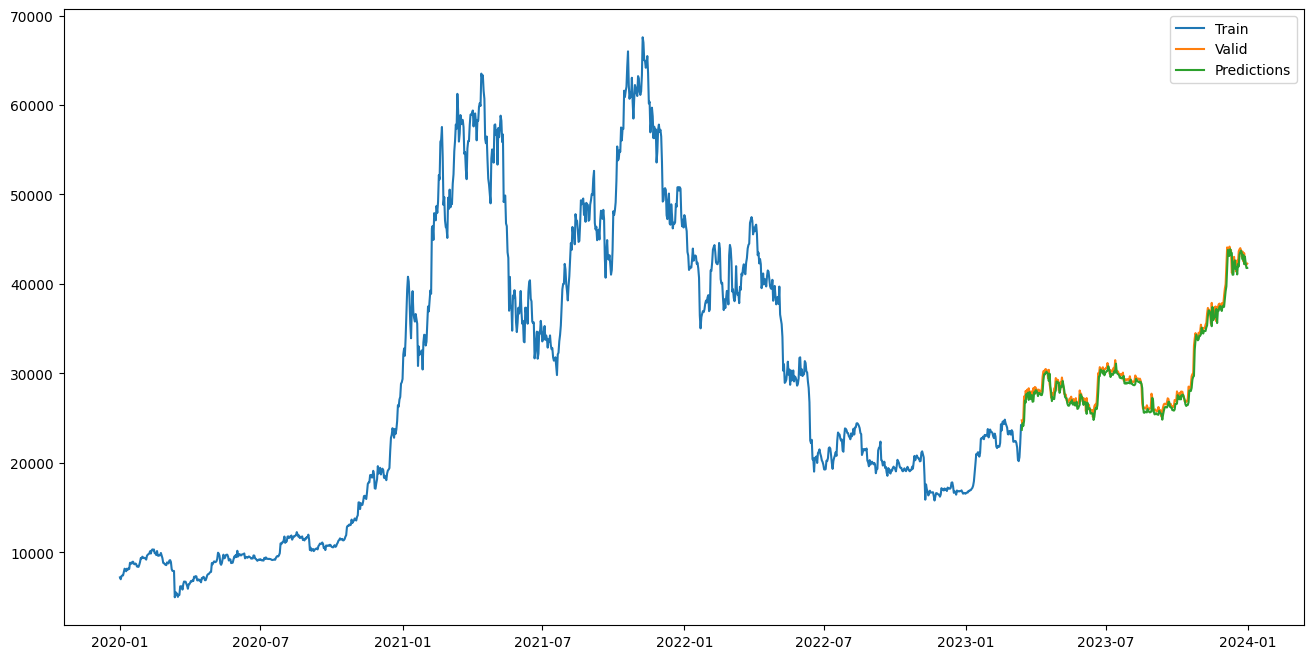

In [ ]:
#train model
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Fetch cryptocurrency data
crypto_symbol = 'BTC-USD'
df_crypto = yf.download(crypto_symbol, start="2020-01-01", end="2024-01-01")

# Preprocess the data
df_crypto["Date"] = df_crypto.index
data = df_crypto.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0, len(df_crypto)), columns=['Date', 'Close'])

for i in range(0, len(data)):
    new_data["Date"][i] = data['Date'][i]
    new_data["Close"][i] = data["Close"][i]

new_data.index = new_data.Date
new_data.drop("Date", axis=1, inplace=True)

dataset = new_data.values
train = dataset[0:int(0.8 * len(dataset)), :]
valid = dataset[int(0.8 * len(dataset)):, :]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60, len(train)):
    x_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build and train the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2)

# Save the model
model.save("saved_model.h5")

# Predicting
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

train = new_data[:int(0.8 * len(dataset))]
valid = new_data[int(0.8 * len(dataset)):]
valid['Predictions'] = closing_price

# Plot the results
plt.figure(figsize=(16, 8))
plt.plot(train["Close"], label="Train")
plt.plot(valid["Close"], label="Valid")
plt.plot(valid["Predictions"], label="Predictions")
plt.legend()
plt.show()


In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.graph_objs as go
from dash.dependencies import Input, Output
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import yfinance as yf

app = dash.Dash()
server = app.server

scaler = MinMaxScaler(feature_range=(0, 1))

# List of cryptocurrencies
crypto_symbols = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'USDT-USD', 'XRP-USD', 'ADA-USD', 'DOGE-USD', 'SOL-USD', 'DOT-USD', 'UNI1-USD']

# Fetch data from Yahoo Finance
crypto_data = {}
for symbol in crypto_symbols:
    crypto_data[symbol] = yf.download(symbol, start="2020-01-01", end="2024-01-01")

# Process the data for a single cryptocurrency (e.g., BTC-USD)
df_crypto = crypto_data['BTC-USD']
df_crypto["Date"] = df_crypto.index

data = df_crypto.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0, len(df_crypto)), columns=['Date', 'Close'])

for i in range(0, len(data)):
    new_data["Date"][i] = data['Date'][i]
    new_data["Close"][i] = data["Close"][i]

new_data.index = new_data.Date
new_data.drop("Date", axis=1, inplace=True)

dataset = new_data.values
train = dataset[0:int(0.8 * len(dataset)), :]
valid = dataset[int(0.8 * len(dataset)):, :]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60, len(train)):
    x_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Load the trained model
model = load_model("saved_model.h5")

inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

train = new_data[:int(0.8 * len(dataset))]
valid = new_data[int(0.8 * len(dataset)):]
valid['Predictions'] = closing_price

app.layout = html.Div([
    html.H1("Cryptocurrency Price Analysis Dashboard", style={"textAlign": "center"}),

    dcc.Tabs(id="tabs", children=[

        dcc.Tab(label='BTC-USD Data', children=[
            html.Div([
                html.H2("Actual closing price", style={"textAlign": "center"}),
                dcc.Graph(
                    id="Actual Data",
                    figure={
                        "data": [
                            go.Scatter(
                                x=train.index,
                                y=valid["Close"],
                                mode='markers'
                            )
                        ],
                        "layout": go.Layout(
                            title='Scatter plot',
                            xaxis={'title': 'Date'},
                            yaxis={'title': 'Closing Rate'}
                        )
                    }
                ),
                html.H2("LSTM Predicted closing price", style={"textAlign": "center"}),
                dcc.Graph(
                    id="Predicted Data",
                    figure={
                        "data": [
                            go.Scatter(
                                x=valid.index,
                                y=valid["Predictions"],
                                mode='markers'
                            )
                        ],
                        "layout": go.Layout(
                            title='Scatter plot',
                            xaxis={'title': 'Date'},
                            yaxis={'title': 'Closing Rate'}
                        )
                    }
                )
            ])
        ]),
        dcc.Tab(label='Cryptocurrency Data', children=[
            html.Div([
                html.H1("Cryptocurrency Prices High vs Lows", style={'textAlign': 'center'}),
                dcc.Dropdown(id='crypto-dropdown',
                             options=[{'label': symbol, 'value': symbol} for symbol in crypto_symbols],
                             multi=True, value=['BTC-USD'],
                             style={"display": "block", "margin-left": "auto",
                                    "margin-right": "auto", "width": "60%"}),
                dcc.Graph(id='highlow'),
                html.H1("Cryptocurrency Market Volume", style={'textAlign': 'center'}),
                dcc.Dropdown(id='crypto-dropdown2',
                             options=[{'label': symbol, 'value': symbol} for symbol in crypto_symbols],
                             multi=True, value=['BTC-USD'],
                             style={"display": "block", "margin-left": "auto",
                                    "margin-right": "auto", "width": "60%"}),
                dcc.Graph(id='volume')
            ], className="container"),
        ])
    ])
])

@app.callback(Output('highlow', 'figure'),
              [Input('crypto-dropdown', 'value')])
def update_graph(selected_dropdown):
    trace1 = []
    trace2 = []
    for symbol in selected_dropdown:
        trace1.append(
            go.Scatter(x=crypto_data[symbol].index,
                       y=crypto_data[symbol]["High"],
                       mode='lines', opacity=0.7,
                       name=f'High {symbol}', textposition='bottom center'))
        trace2.append(
            go.Scatter(x=crypto_data[symbol].index,
                       y=crypto_data[symbol]["Low"],
                       mode='lines', opacity=0.6,
                       name=f'Low {symbol}', textposition='bottom center'))
    traces = [trace1, trace2]
    data = [val for sublist in traces for val in sublist]
    figure = {'data': data,
              'layout': go.Layout(colorway=["#5E0DAC", '#FF4F00', '#375CB1',
                                            '#FF7400', '#FFF400', '#FF0056'],
                                  height=600,
                                  title=f"High and Low Prices for {', '.join(str(i) for i in selected_dropdown)} Over Time",
                                  xaxis={"title": "Date",
                                         'rangeselector': {'buttons': list([{'count': 1, 'label': '1M',
                                                                             'step': 'month',
                                                                             'stepmode': 'backward'},
                                                                            {'count': 6, 'label': '6M',
                                                                             'step': 'month',
                                                                             'stepmode': 'backward'},
                                                                            {'step': 'all'}])},
                                         'rangeslider': {'visible': True}, 'type': 'date'},
                                  yaxis={"title": "Price (USD)"})}
    return figure

@app.callback(Output('volume', 'figure'),
              [Input('crypto-dropdown2', 'value')])
def update_graph(selected_dropdown_value):
    trace1 = []
    for symbol in selected_dropdown_value:
        trace1.append(
            go.Scatter(x=crypto_data[symbol].index,
                       y=crypto_data[symbol]["Volume"],
                       mode='lines', opacity=0.7,
                       name=f'Volume {symbol}', textposition='bottom center'))
    traces = [trace1]
    data = [val for sublist in traces for val in sublist]
    figure = {'data': data,
              'layout': go.Layout(colorway=["#5E0DAC", '#FF4F00', '#375CB1',
                                            '#FF7400', '#FFF400', '#FF0056'],
                                  height=600,
                                  title=f"Market Volume for {', '.join(str(i) for i in selected_dropdown_value)} Over Time",
                                  xaxis={"title": "Date",
                                         'rangeselector': {'buttons': list([{'count': 1, 'label': '1M',
                                                                             'step': 'month',
                                                                             'stepmode': 'backward'},
                                                                            {'count': 6, 'label': '6M',
                                                                             'step': 'month',
                                                                             'stepmode': 'backward'},
                                                                            {'step': 'all'}])},
                                         'rangeslider': {'visible': True}, 'type': 'date'},
                                  yaxis={"title": "Transactions Volume"})}
    return figure

if __name__ == '__main__':
    app.run_server(debug=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


10/10 [==============================] - 1s 14ms/step


<ipython-input-7-12015ffbbeef>:72: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<IPython.core.display.Javascript object>